# First Plot Attempt
*Akira Di Sandro, 6/9/20*
<br>
First attempt at using data to plot something. Code taken mostly from Raf's tutorial notebooks.

## 1. Import python packages that we need

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import xarray as xr
xr.set_options(display_style='html')
import intake
%matplotlib inline
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

## 2. Load CMIP data to find CM4 dataset
I want this dataset to specifically have velocity data so I can plot these.

In [3]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
col

,unique
activity_id,15
institution_id,33
source_id,73
experiment_id,103
member_id,169
table_id,29
variable_id,370
grid_label,10
zstore,269868
dcpp_init_year,60


Refine Search: specifically changed the variable_id from 'tos' (sea surface temperature) to 'uo' (eastward sea water veolicty) and changed experiment_id from both 'historical and 'ssp585' to just 'historical'.

In [4]:
dog = col.search(source_id='GFDL-CM4', experiment_id='historical', table_id='Omon', variable_id=['uo','vo','wo'], grid_label='gn')
#variable_id: uo=eastward_sea_water_velocity, vo=northward_sea_water_velocity, wo=upward_sea_water_velocity
dog.df
#called dog instead of cat just because I was using Raf's code in here to help me debug & wanted my code to be different from his

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year
0,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Omon,uo,gn,gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/historical/...,NaN
1,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,Omon,vo,gn,gs://cmip6/CMIP/NOAA-GFDL/GFDL-CM4/historical/...,NaN


In [5]:
dset_dict = dog.to_dataset_dict(zarr_kwargs={'consolidated': True})
list(dset_dict.keys())

Dataset(s):   0%|                                        | 0/1 [00:00<?, ?it/s]


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


Dataset(s): 100%|████████████████████████████████| 1/1 [00:00<00:00,  1.29it/s]


['CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gn']

In [6]:
CM4_hist = dset_dict['CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gn']
CM4_hist

<xarray.Dataset>
Dimensions:    (bnds: 2, lev: 35, member_id: 1, time: 1980, x: 1440, y: 1080)
Coordinates:
    time_bnds  (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
    lon        (y, x) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
    lat        (y, x) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
    lev_bnds   (lev, bnds) float64 dask.array<chunksize=(35, 2), meta=np.ndarray>
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * y          (y) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * x          (x) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * bnds       (bnds) float64 1.0 2.0
  * member_id  (member_id) <U8 'r1i1p1f1'
Data variables:
    uo         (member_id, time, lev, y, x) float32 dask.array<chunksize=(1, 1, 35, 1080, 1440), meta=np.ndarray>
    vo         (member_id, time, lev, y, x) float32 dask.array<chunksize=(1, 1, 35, 1080, 1440), meta=np.ndarray>
Attributes:
    title:                   NOAA GFDL GFDL-CM4 model output prepared for CMI...
    branch_method:           standard
    sub_experiment_id:       none
    references:              see further_info_url attribute
    mip_era:                 CMIP6
    forcing_index:           1
    initialization_index:    1
    parent_time_units:       days since 0001-1-1
    institution:             National Oceanic and Atmospheric Administration,...
    contact:                 gfdl.climate.model.info@noaa.gov
    Conventions:             CF-1.7 CMIP-6.0 UGRID-1.0
    data_specs_version:      01.00.27
    product:                 model-output
    source:                  GFDL-CM4 (2018): \naerosol: interactive\natmos: ...
    branch_time_in_child:    0.0
    sub_experiment:          none
    further_info_url:        https://furtherinfo.es-doc.org/CMIP6.NOAA-GFDL.G...
    license:                 CMIP6 model data produced by NOAA-GFDL is licens...
    branch_time_in_parent:   36500.0
    experiment:              historical
    parent_source_id:        GFDL-CM4
    variant_label:           r1i1p1f1
    realization_index:       1
    realm:                   ocean
    tracking_id:             hdl:21.14100/d0ebcd36-d2cd-442e-a8d9-8f7a27168a2...
    parent_variant_label:    r1i1p1f1
    source_type:             AOGCM
    parent_activity_id:      CMIP
    institution_id:          NOAA-GFDL
    parent_experiment_id:    piControl
    history:                 File was processed by fremetar (GFDL analog of C...
    frequency:               mon
    physics_index:           1
    activity_id:             CMIP
    parent_mip_era:          CMIP6
    status:                  2019-08-06;created;by nhn2@columbia.edu
    source_id:               GFDL-CM4
    variant_info:            N/A
    nominal_resolution:      25 km
    grid:                    ocean data on native grid tripolar - nominal 0.2...
    comment:                 <null ref>
    experiment_id:           historical
    grid_label:              gn
    table_id:                Omon
    intake_esm_dataset_key:  CMIP.NOAA-GFDL.GFDL-CM4.historical.Omon.gn

* slight tangent 

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

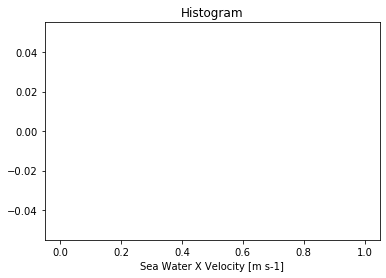

In [16]:
#ds.sla.sel(time='1982-08-07', method='nearest').plot()
    #the above code is what the sea surface altimetry data had to initially 
    #look at data overall in a plot
CM4_hist.uo.sel(time='2000-08-07').plot()

this did not work as planned. I based this code on the sea surface altimetry use casenotebook

## 3. Specify parameters
Average the time for 2012. Specify what range of latitude and longitude to plot. Do I want to look at a specific latitude and range of longitude (or vice versa)?

In [8]:
uo_2012 = CM4_hist['uo'].sel(time='2012').mean(dim='time')
uo_2012

<xarray.DataArray 'uo' (member_id: 1, lev: 35, y: 1080, x: 1440)>
dask.array<mean_agg-aggregate, shape=(1, 35, 1080, 1440), dtype=float32, chunksize=(1, 35, 1080, 1440), chunktype=numpy.ndarray>
Coordinates:
    lon        (y, x) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
    lat        (y, x) float32 dask.array<chunksize=(1080, 1440), meta=np.ndarray>
  * y          (y) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * x          (x) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * member_id  (member_id) <U8 'r1i1p1f1'

* trying a line of code from Raf's MOM6 cookbook

In [24]:
#snap1 = CM4_hist['uo'].sel(x=slice(147.0,164.0), y=slice(-12.0,-2.0), time='2012').mean(dim='time')
#snap1
#snap2 = CM4_hist['uo'].sel(lev=2.5).mean(dim='time')
#snap2
#snap3 = CM4_hist['uo'].sel(x=slice(50,50.2), y=slice(-12.0,-2.0), time='2012').mean(dim='time')
#snap3
snap4 = CM4_hist['uo'].sel(x=-180.0, method='nearest').mean(dim='time')
snap4   #nearest is only working with one variable

<xarray.DataArray 'uo' (member_id: 1, lev: 35, y: 1080)>
dask.array<mean_agg-aggregate, shape=(1, 35, 1080), dtype=float32, chunksize=(1, 35, 1080), chunktype=numpy.ndarray>
Coordinates:
    lon        (y) float32 dask.array<chunksize=(1080,), meta=np.ndarray>
    lat        (y) float32 dask.array<chunksize=(1080,), meta=np.ndarray>
  * y          (y) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
    x          float64 -180.1
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * member_id  (member_id) <U8 'r1i1p1f1'